In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = './airpassenger.txt'
df = pd.read_csv(a, sep="\s+", header=None)
df.head()

,0,1,2
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121


In [3]:
def get_date(Y, m):
    return [datetime.datetime.strptime('{}{}'.format(yy, mm), "%Y%m").date() for yy, mm in zip(Y, m)]

In [5]:
date = get_date(df[0], df[1])
value = df[2]

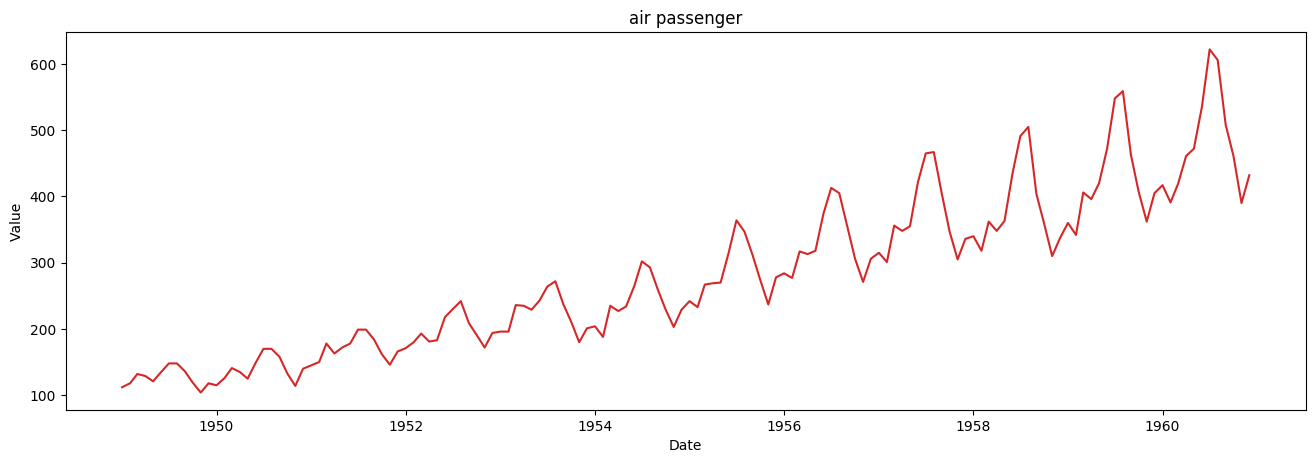

In [9]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100, show=True):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    if show:
        plt.show()

plot_df(df, x=date, y=value, title='air passenger')

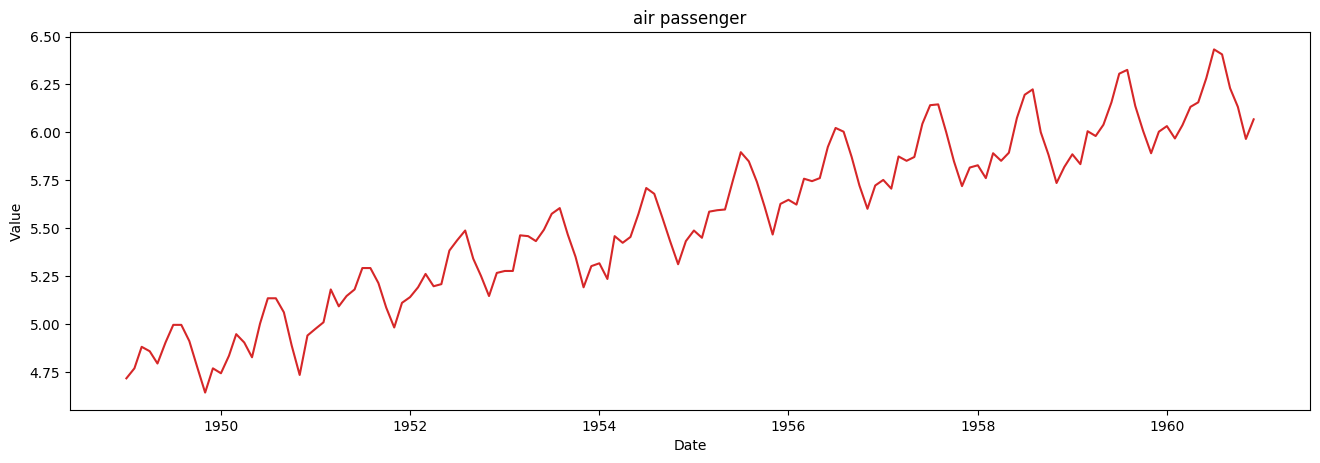

In [7]:
plot_df(df, x=date, y=np.log(value), title='air passenger')

### bare linear regression

4.823716664000669
[0.01004838]


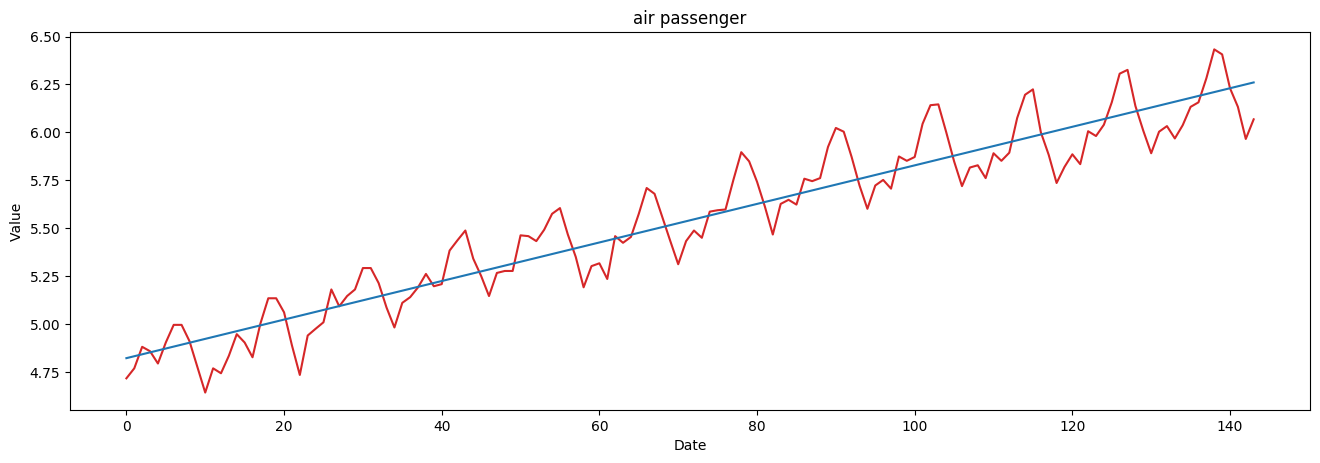

In [15]:
from sklearn import linear_model

x = np.arange(len(date)).reshape(-1, 1)
y = np.log(value)

regressor = linear_model.LinearRegression()  
regressor.fit(x, y) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

plot_df(df, x=x, y=y, title='air passenger', show=False)
plt.plot(x, x * regressor.coef_ + regressor.intercept_)
plt.show()

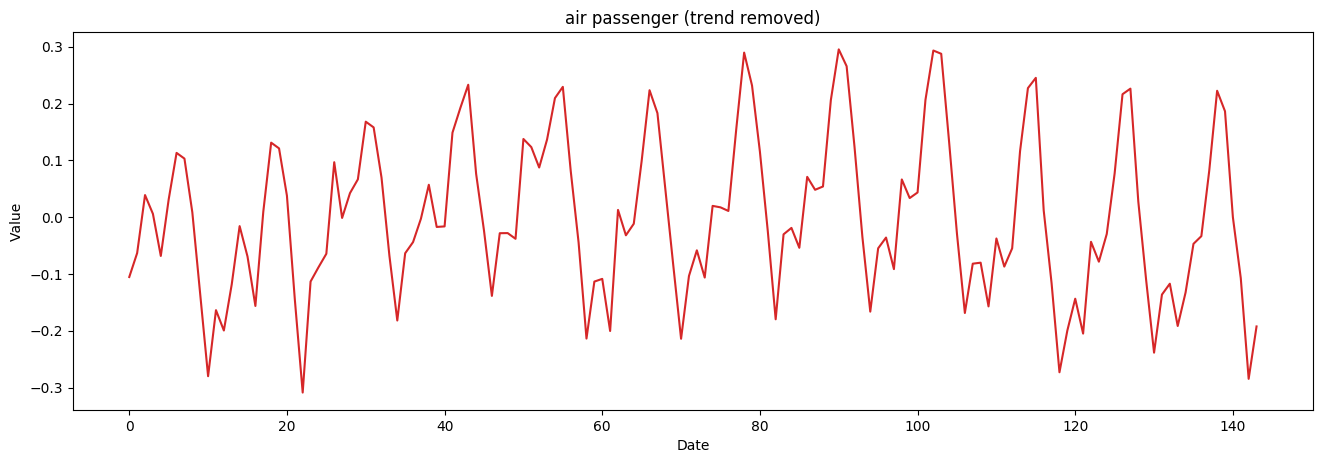

In [31]:
plot_df(df, x=x, y=y-(x * regressor.coef_ + regressor.intercept_).squeeze(), title='air passenger (trend removed)')

In [18]:
def get_seasonality(x, interval=12):
    xx = x.reshape(-1, interval)
    return np.mean(xx, axis=0)

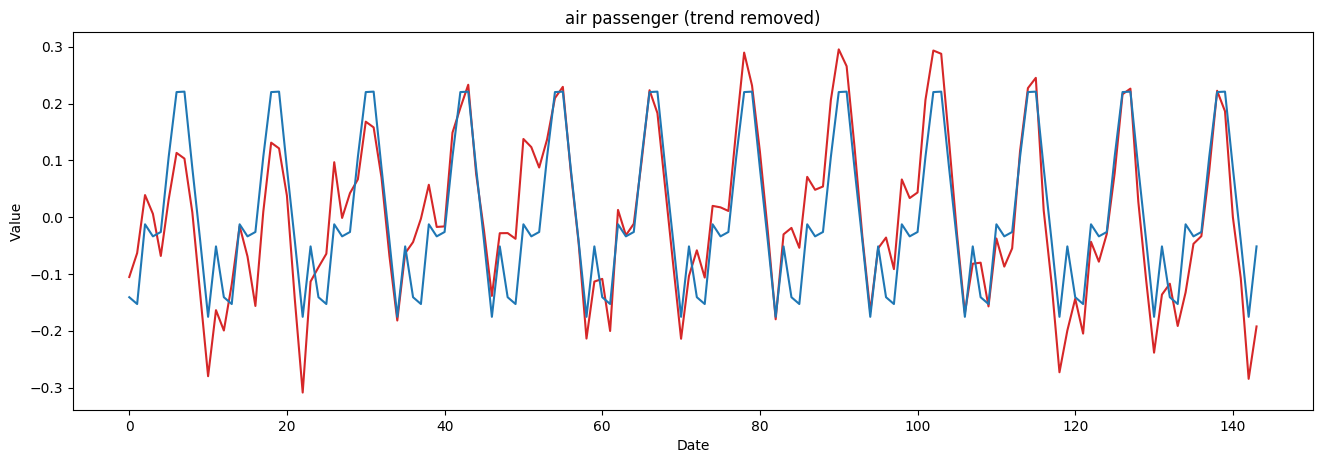

In [48]:
trend = x * regressor.coef_ + regressor.intercept_
interval = 12
season = np.tile(get_seasonality(y.values - trend), len(x) // interval)

plot_df(df, x=x, y=y-(x * regressor.coef_ + regressor.intercept_).squeeze(), title='air passenger (trend removed)', show=False)
plt.plot(x.squeeze(), season)
plt.show()

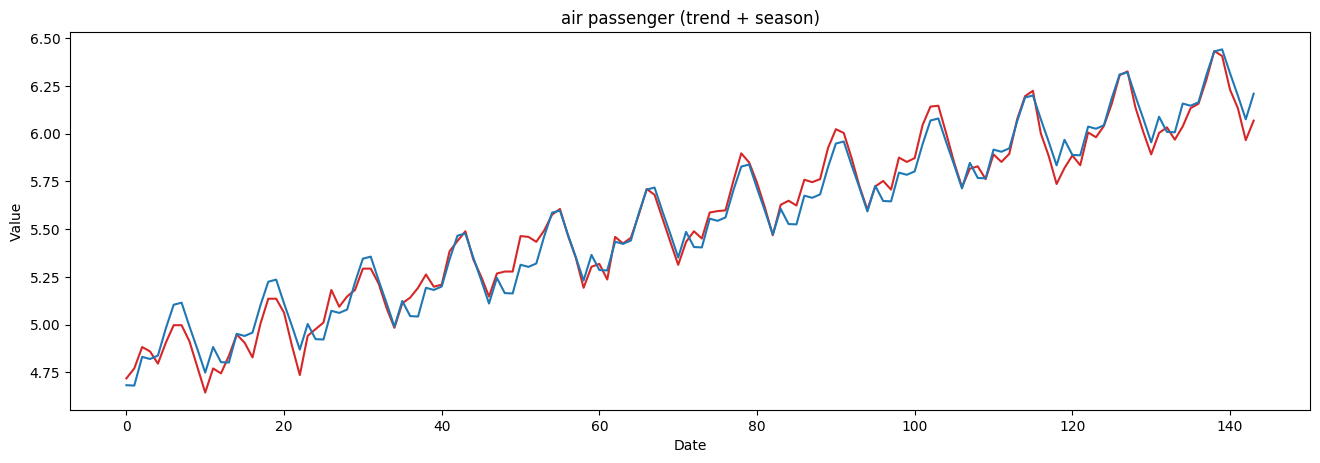

In [49]:
plot_df(df, x=x.squeeze(), y=y.squeeze(), title='air passenger (trend + season)', show=False)
plt.plot(x.squeeze(), trend.squeeze() + season)
plt.show()